In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Coca=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
Coca.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
Coca.shape

(42, 2)

In [4]:
Coca.dtypes

Quarter     object
Sales      float64
dtype: object

In [5]:
Coca.info

<bound method DataFrame.info of    Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_

In [6]:
Coca.describe

<bound method NDFrame.describe of    Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q

# Visualisation

/Users/snehakoneru/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


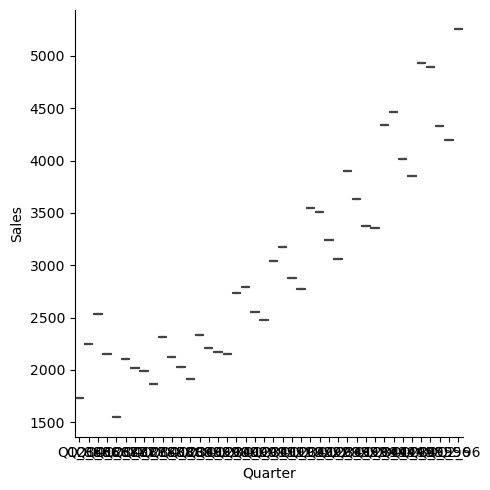

In [13]:
sns.catplot(x="Quarter",y="Sales",kind="box",data=Coca)

<Axes: xlabel='Sales'>

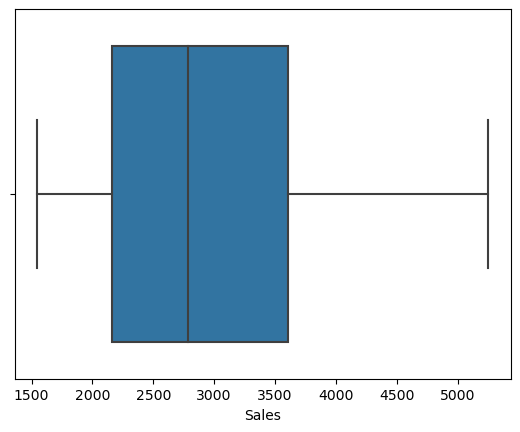

In [16]:
sns.boxplot(x="Sales",data=Coca)

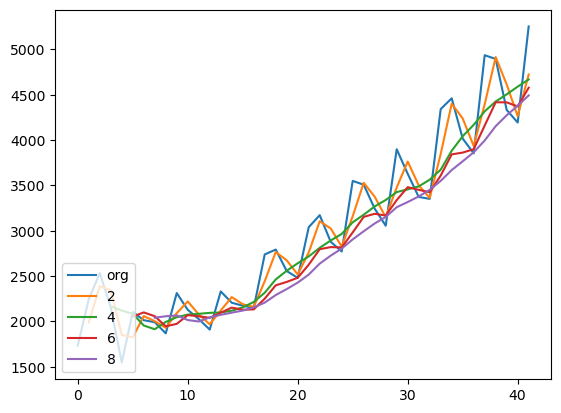

In [17]:
Coca.Sales.plot(label="org")
for i in range(2,10,2):
    Coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<Axes: >

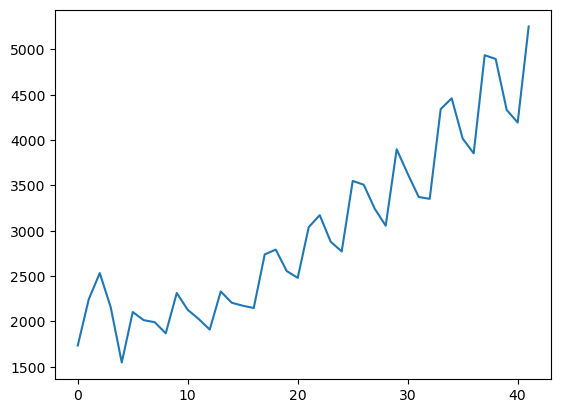

In [18]:
Coca.Sales.plot()

<Axes: >

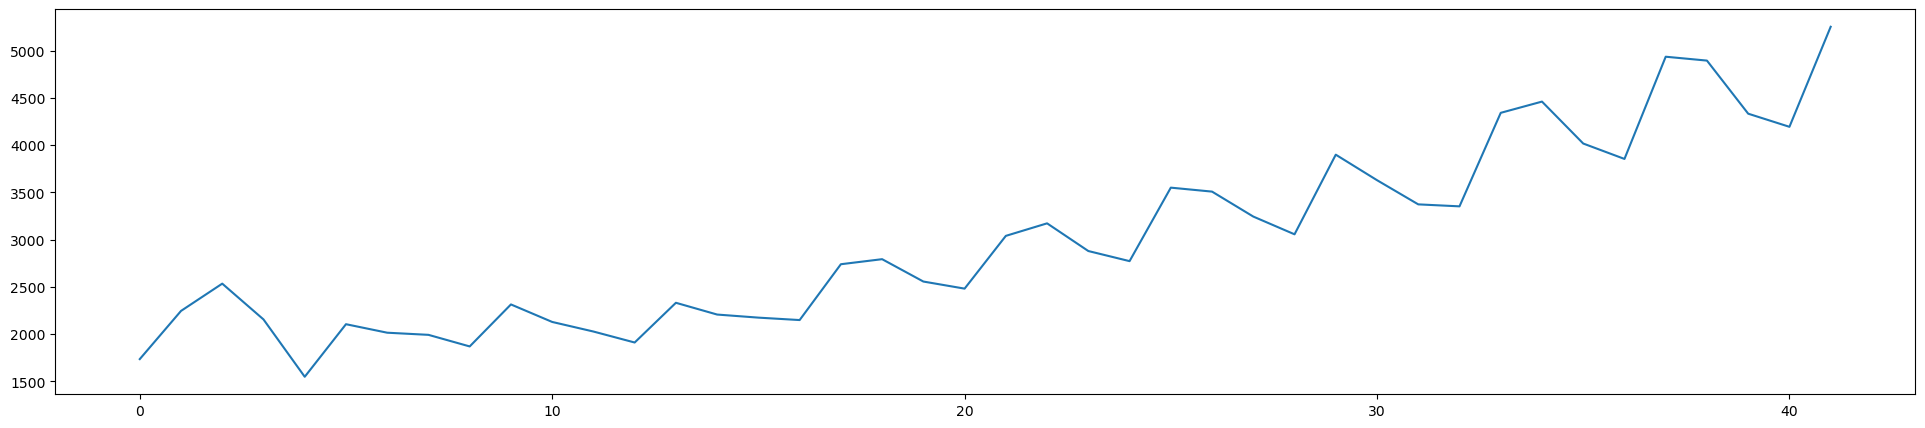

In [19]:
plt.figure(figsize=(24,5))
Coca.Sales.plot()

# Preprocessing

In [20]:
quarter=['Q1','Q2','Q3','Q4']
n=Coca['Quarter'][0]
n[0:2]

'Q1'

In [21]:
Coca['quarter']=0
for i in range(42):
    n=Coca['Quarter'][i]
    Coca['quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(Coca['quarter']))
    coco=pd.concat((Coca,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']
log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales

/var/folders/gh/_7nf_xl92bd8fjzld_vp7b8m0000gn/T/ipykernel_1386/2875716343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coca['quarter'][i]=n[0:2]


In [22]:
coco

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,True,False,False,False,5,25,7.344602
5,Q2_87,2104.411995,Q2,False,True,False,False,6,36,7.651791
6,Q3_87,2014.362999,Q3,False,False,True,False,7,49,7.608058
7,Q4_87,1991.746998,Q4,False,False,False,True,8,64,7.596767
8,Q1_88,1869.049999,Q1,True,False,False,False,9,81,7.533186
9,Q2_88,2313.631996,Q2,False,True,False,False,10,100,7.746574


<Axes: xlabel='quarter', ylabel='Sales'>

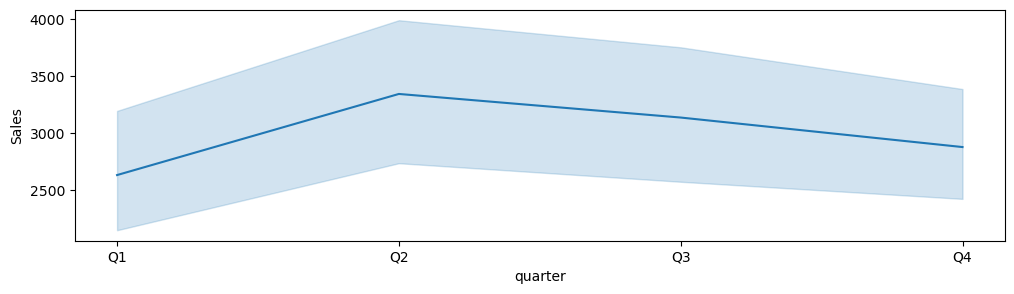

In [23]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=Coca)


# Splitting data

In [24]:
Train = coco.head(34)

In [25]:
Test = coco.iloc[34:38,:]

In [26]:
predict_data = coco.tail(4)

In [27]:
Coca2= coco.iloc[0:38,:]

In [28]:
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,True,False,False,False,5,25,7.344602
5,Q2_87,2104.411995,Q2,False,True,False,False,6,36,7.651791
6,Q3_87,2014.362999,Q3,False,False,True,False,7,49,7.608058
7,Q4_87,1991.746998,Q4,False,False,False,True,8,64,7.596767
8,Q1_88,1869.049999,Q1,True,False,False,False,9,81,7.533186
9,Q2_88,2313.631996,Q2,False,True,False,False,10,100,7.746574


In [29]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
34,Q3_94,4461.0,Q3,False,False,True,False,35,1225,8.403128
35,Q4_94,4017.0,Q4,False,False,False,True,36,1296,8.298291
36,Q1_95,3854.0,Q1,True,False,False,False,37,1369,8.256867
37,Q2_95,4936.0,Q2,False,True,False,False,38,1444,8.504311


In [31]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,False,False,True,False,39,1521,8.495970
39,Q4_95,4333.0,Q4,False,False,False,True,40,1600,8.374015
40,Q1_96,4194.0,Q1,True,False,False,False,41,1681,8.341410
41,Q2_96,5253.0,Q2,False,True,False,False,42,1764,8.566555


# Build Model & Calculate RMSE Values

Linear Model

In [32]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear 

669.4685590402643

Exponential

In [33]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.5012993862535

Quadratic

In [34]:
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

394.6747277541497

Additive Seasonality

In [35]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1686.738964636289

Additive Seasonality Quadratic

In [36]:
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

174.88610047129004

Multiplicative Seasonality

In [37]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1757.7740414202372

Multiplicative Additive Seasonality

In [38]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

404.5642262160204

# Compare the results

In [39]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,174.886100
2,rmse_Quad,394.674728
6,rmse_Mult_add_sea,404.564226
1,rmse_Exp,564.501299
0,rmse_linear,669.468559
3,rmse_add_sea,1686.738965
5,rmse_Mult_sea,1757.774041


# Predict the New model

In [40]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,False,False,True,False,39,1521,8.495970
39,Q4_95,4333.0,Q4,False,False,False,True,40,1600,8.374015
40,Q1_96,4194.0,Q1,True,False,False,False,41,1681,8.341410
41,Q2_96,5253.0,Q2,False,True,False,False,42,1764,8.566555


Build the model on entire data set

In [41]:
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Coca2).fit()


In [42]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

38    4839.220330
39    4731.881928
40    4668.345851
41    5399.952382
dtype: float64